In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df = pd.read_csv('SalesKaggle3.csv')
df.describe()
#print(data)
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [9]:
df.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [10]:
#if we delete all the colomn which soldflag and soldcount is null,we only have less than 80000 colomn,so we decided to keep all the data.

In [11]:
def Method_ABC(perc):
    if perc > 0 and perc< 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85 :
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [12]:
subset = df[['SKU_number','PriceReg','ItemCount','File_Type','MarketingType','StrengthFactor']][(df['File_Type'] == 'Historical')]
# create the column of the additive cost per SKU
subset['AddCost'] = subset['PriceReg'] * subset['ItemCount']
# order by cumulative cost
subset = subset.sort_values(by=['AddCost'], ascending=False)
# create the column of the running CumCost of the cumulative cost per SKU
subset['RunCumCost'] = subset['AddCost'].cumsum()
# create the column of the total sum
subset['TotSum'] = subset['AddCost'].sum()
# create the column of the running percentage
subset['RunPerc'] =  subset['RunCumCost']/subset['TotSum']
# create the column of the class
subset['Class'] = subset['RunPerc'].apply(Method_ABC)
subset.head()
#feature_data=subset.iloc[:,[0,-1]][subset[subset.T.index[-1]]=='A']
#print(feature_data)

,SKU_number,PriceReg,ItemCount,File_Type,MarketingType,StrengthFactor,AddCost,RunCumCost,TotSum,RunPerc,Class
685,145889,244.6,851,Historical,D,2338.0,208154.6,208154.6,3.426320e+08,0.000608,A
601,435034,281.8,616,Historical,D,1746.0,173588.8,381743.4,3.426320e+08,0.001114,A
75056,538479,2645.3,49,Historical,S,85265.0,129619.7,511363.1,3.426320e+08,0.001492,A
5752,212633,235.6,521,Historical,D,12749.0,122747.6,634110.7,3.426320e+08,0.001851,A
3758,212480,208.8,579,Historical,D,14870.0,120895.2,755005.9,3.426320e+08,0.002204,A


In [13]:
subset.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [14]:
print ('Cost of Class A :', subset[subset.Class == 'A']['AddCost'].sum())
print ('Cost of Class B :', subset[subset.Class == 'B']['AddCost'].sum())
print ('Cost of Class C :', subset[subset.Class == 'C']['AddCost'].sum())

Cost of Class A : 205577451.4
Cost of Class B : 85658215.25999999
Cost of Class C : 51396361.129999995


In [15]:
print ('Percent of Cost of Class A :', subset[subset.Class == 'A']['AddCost'].sum()/subset['AddCost'].sum())
print ('Percent of Cost of Class B :', subset[subset.Class == 'B']['AddCost'].sum()/subset['AddCost'].sum())
print ('Percent of Cost of Class C :', subset[subset.Class == 'C']['AddCost'].sum()/subset['AddCost'].sum())

Percent of Cost of Class A : 0.5999948479013728
Percent of Cost of Class B : 0.2500006079773141
Percent of Cost of Class C : 0.15000454412131298


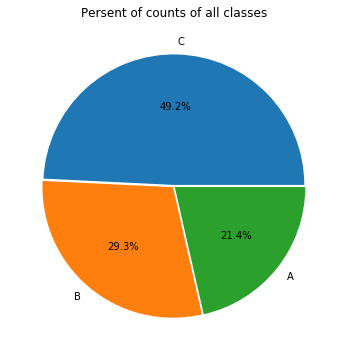

In [16]:
plt.figure(figsize=(6,6))#将画布设定为正方形，则绘制的饼图是正圆
label=['C','B','A']#定义饼图的标签，标签是列表
explode=[0.01,0.01,0.01]#设定各项距离圆心n个半径
#values=[0.2144,0.2933,0.4923]
values=subset.Class.value_counts('A')
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
plt.title('Persent of counts of all classes')#绘制标题
plt.show()


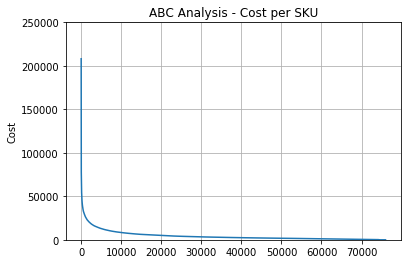

In [17]:
#选取 AddCost，价值：cost=price*count
performance = subset['AddCost'].tolist()

#创建长度为performance的等差数组
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance) #输出图像，横轴：y_pos（等差数组），纵轴：performance（价值）
plt.ylabel('Cost') 
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True) #设置网格线
plt.ylim((0,250000)) #y轴上的最小值，最大值
plt.show()

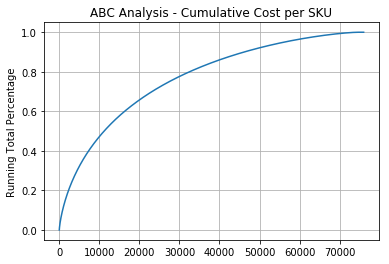

In [18]:
#选取数据RunPerc，累计百分比：每行cost累计数据/cost累计数据最大值
performance = subset['RunPerc'].tolist()

#输出个数为performance的等差数列
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance) #输出图像，横轴：y_pos，纵轴：performance
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU') #每个产品的累积成本
plt.grid(True)
plt.show()

In [19]:
print(df.nunique())

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64


S    100946
D     97971
Name: MarketingType, dtype: int64

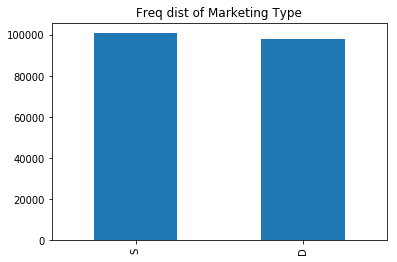

In [20]:
df['MarketingType'].value_counts().plot.bar(title="Freq dist of Marketing Type")
df.MarketingType.value_counts()

1    127754
0     71163
Name: New_Release_Flag, dtype: int64

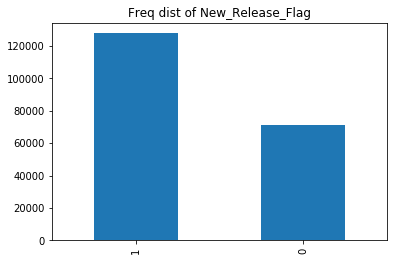

In [21]:
df['New_Release_Flag'].value_counts().plot.bar(title="Freq dist of New_Release_Flag")
df.New_Release_Flag.value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

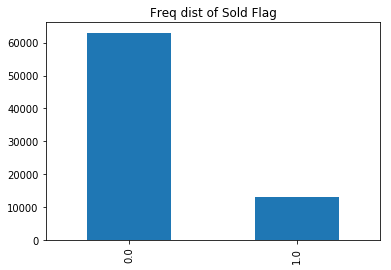

In [22]:
df['SoldFlag'].value_counts().plot.bar(title="Freq dist of Sold Flag")
df.SoldFlag.value_counts()

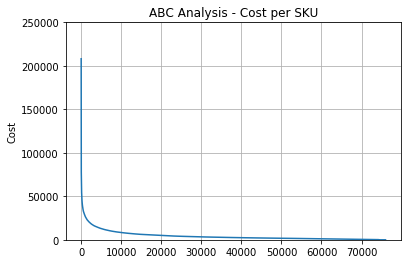

In [23]:
performance = subset['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

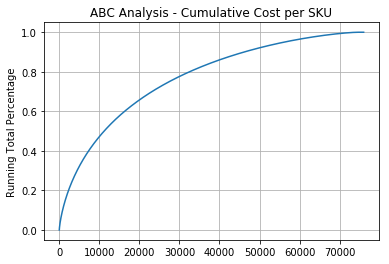

In [24]:
performance = subset['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()

In [25]:
sales_data_hist = df[df['File_Type'] == 'Historical']
sales_data_act = df[df['File_Type'] == 'Active']

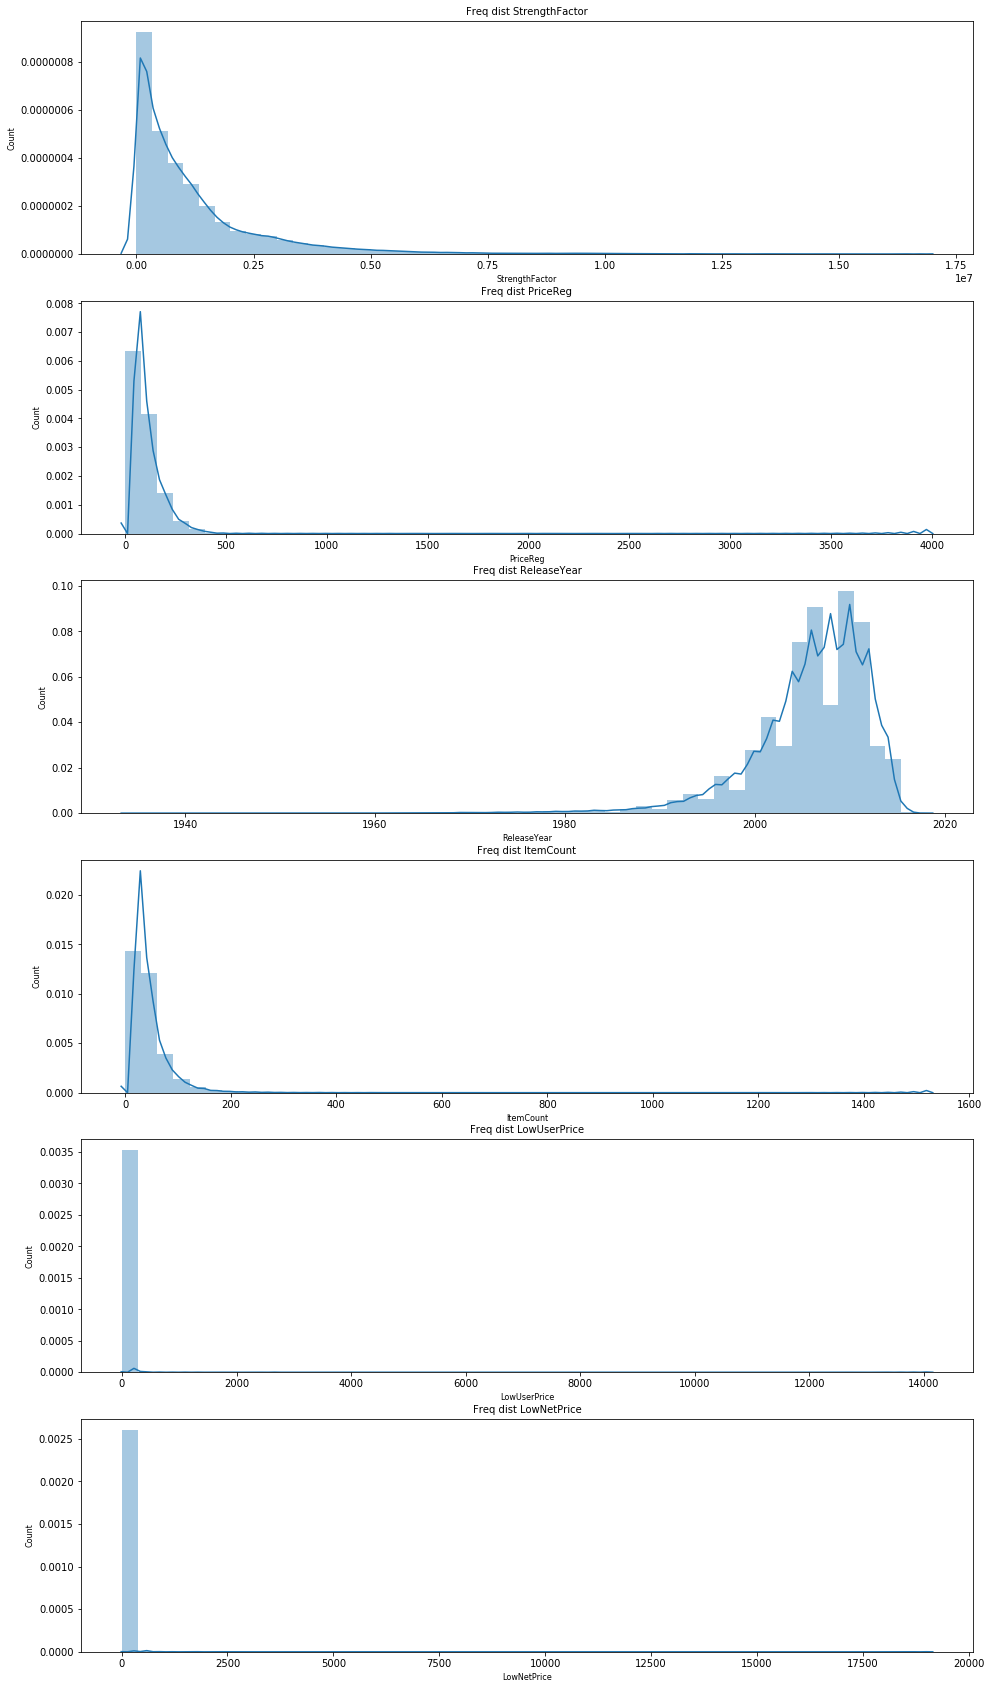

In [26]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(16,30))

for i, col_val in enumerate(col_names):
        
    sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

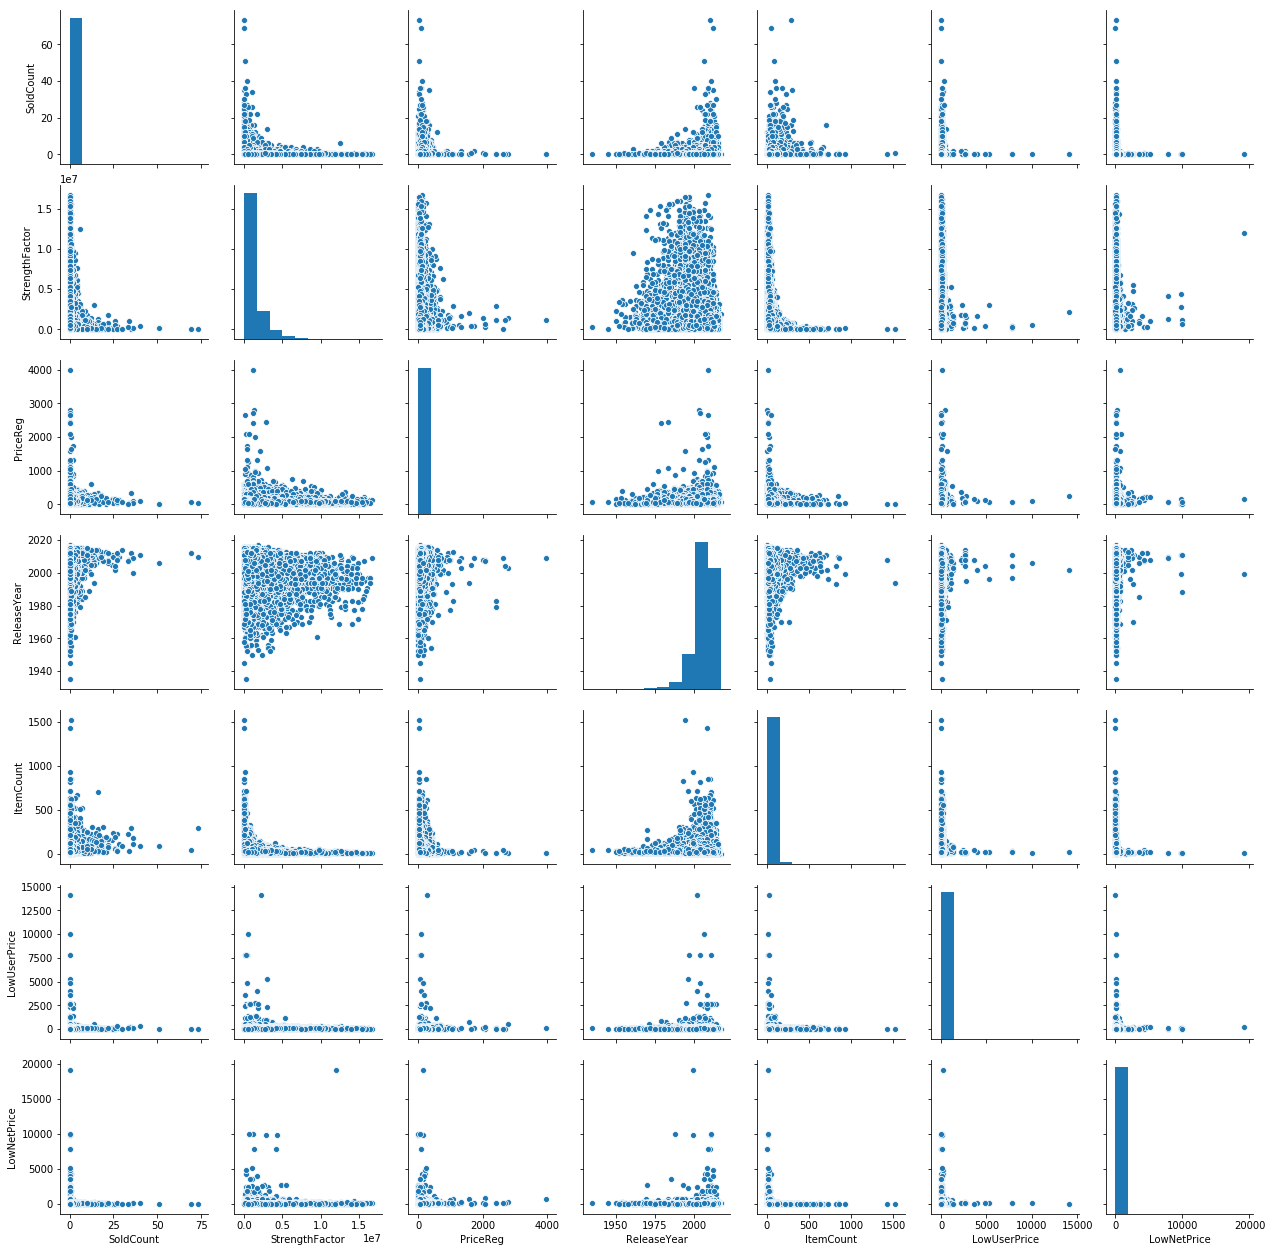

In [27]:
sales_data_hist = sales_data_hist.drop(['Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'], axis=1)
sns.pairplot(sales_data_hist)

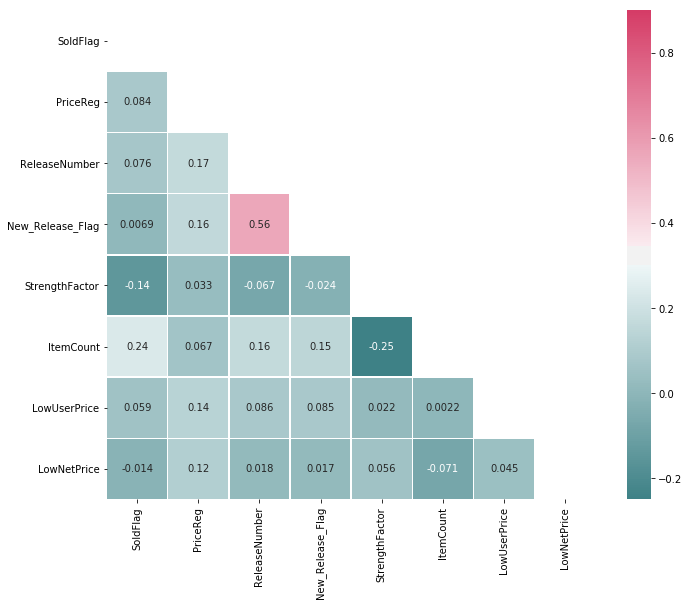

In [28]:
corr = df[['SoldFlag','MarketingType','PriceReg','ReleaseNumber','New_Release_Flag','StrengthFactor','ItemCount','LowUserPrice','LowNetPrice']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, annot=True, ax=ax)

In [29]:
# Converting maarketing type to categorical variable 
df['MarketingType'] = df['MarketingType'].astype('category')
df['MarketingType'] = df['MarketingType'].cat.codes

# Splitting the historical and active state
sales_data_hist = df[df['File_Type'] == 'Historical']
sales_data_act = df[df['File_Type'] == 'Active']

In [30]:
dataset = pd.read_csv('SalesKaggle3.csv')

dataset_copy =  dataset.copy()


In [31]:
ClassD_product = dataset_copy[dataset_copy.MarketingType == "D"]
ClassD_product = ClassD_product[["SKU_number","ReleaseNumber","New_Release_Flag","PriceReg","ItemCount","LowUserPrice","LowNetPrice", "SoldFlag"]]

ClassS_product = dataset_copy[dataset_copy.MarketingType == "S"]
ClassS_product = ClassS_product[["SKU_number","ReleaseNumber","New_Release_Flag","PriceReg","ItemCount","LowUserPrice","LowNetPrice", "SoldFlag"]]

ClassD_product_forprediction = ClassD_product[ClassD_product.SoldFlag.isnull()]
ClassD_product_fortrain = ClassD_product[ClassD_product.SoldFlag.isnull()== False]

ClassS_product_forprediction = ClassS_product[ClassS_product.SoldFlag.isnull()]
ClassS_product_fortrain = ClassS_product[ClassS_product.SoldFlag.isnull()== False]

In [32]:
# Data for training and testing for class D products
X_train_D = ClassD_product_fortrain[["ReleaseNumber","New_Release_Flag","PriceReg","ItemCount","LowUserPrice","LowNetPrice"]]
Y_train_D = ClassD_product_fortrain[["SoldFlag"]]

# test data is the data that will be forecasted
X_test_D = ClassD_product_forprediction[["ReleaseNumber","New_Release_Flag","PriceReg","ItemCount","LowUserPrice","LowNetPrice"]]

In [33]:
# Data for training and testing for class S products
X_train_S = ClassS_product_fortrain[["ReleaseNumber","New_Release_Flag","PriceReg","ItemCount","LowUserPrice","LowNetPrice"]]
Y_train_S = ClassS_product_fortrain[["SoldFlag"]]

X_test_S = ClassS_product_forprediction[["ReleaseNumber","New_Release_Flag","PriceReg","ItemCount","LowUserPrice","LowNetPrice"]]

In [34]:
from sklearn.linear_model import LogisticRegression

# Logistic regression
logistic_R = LogisticRegression()

In [35]:
# The training step is developed using 90% of the data, the resting 10% is used to evaluate the Error
logistic_D_train = logistic_R.fit(X_train_D[:31608],Y_train_D[:31608])

/Users/mengyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mengyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
prediction_D_train = logistic_D_train.predict(X_train_D[31608:])
prediction_D_train = pd.DataFrame(prediction_D_train)
prediction_D_train.columns = ["Prediction D"]

In [37]:
# Error level of the logistic classifier
accuracy = 0
for i in range(0, len(prediction_D_train)):
    if Y_train_D["SoldFlag"].ix[31608+i] == prediction_D_train["Prediction D"].ix[i]:
        accuracy += 1
accuracy/len(prediction_D_train)*100

/Users/mengyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


72.97066362859584

In [38]:
# Forecasting for the target data and presenting 
prediction_D_test = logistic_D_train.predict(X_test_D)
prediction_D_test = pd.DataFrame(prediction_D_test)
prediction_D_test.columns = ["Prediction SoldFlag D"]
ClassD_product_forprediction = ClassD_product_forprediction.reset_index()
ClassD_product_forprediction["SoldFlag"] = prediction_D_test["Prediction SoldFlag D"]
ClassD_product_forprediction = ClassD_product_forprediction.set_index("index")
ClassD_product_forprediction.head()

,SKU_number,ReleaseNumber,New_Release_Flag,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
index,,,,,,,,
76168,711217,1,0,26.67,29,4.00,75.33,0.0
76169,443618,5,1,165.00,8,13.99,675.00,0.0
76170,2608794,0,0,73.99,15,7.68,58.05,0.0
76171,1645520,3,1,85.00,17,35.30,85.00,0.0
76172,127161,5,1,63.00,17,21.43,109.75,0.0


0.0    60983
1.0     1869
Name: SoldFlag, dtype: int64

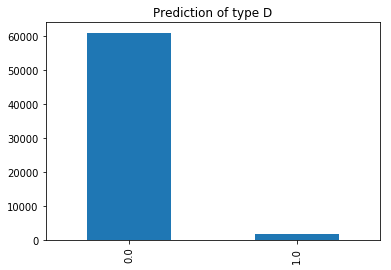

In [39]:
ClassD_product_forprediction['SoldFlag'].value_counts().plot.bar(title="Prediction of type D")
ClassD_product_forprediction.SoldFlag.value_counts()

In [40]:
# Products that would have 1.0 flag 
ClassD_product_forprediction[ClassD_product_forprediction["SoldFlag"]>0].head()

,SKU_number,ReleaseNumber,New_Release_Flag,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
index,,,,,,,,
76825,60790,10,1,169.95,134,4.00,13.19,1.0
76938,2597905,0,0,70.00,230,4.00,11.76,1.0
76963,597604,0,0,17.95,137,4.00,11.16,1.0
77333,52109,4,1,186.95,151,3.97,9.24,1.0
77676,871890,0,0,2820.88,18,4.00,73.27,1.0


In [41]:
# Logistic training for S Class items
logistic_S_train = logistic_R.fit(X_train_S[:36790],Y_train_S[:36790])

/Users/mengyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mengyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
prediction_S_train = logistic_S_train.predict(X_train_S[36790:])
prediction_S_train = pd.DataFrame(prediction_S_train)
prediction_S_train.columns = ["Prediction S"]

In [43]:
# Error level of the classifier
accuracy_S = 0
for i in range(0, len(Y_train_S[36790:])):
    if Y_train_S["SoldFlag"].ix[71909+i] == prediction_S_train["Prediction S"].ix[i]:
        accuracy_S += 1
accuracy_S/len(prediction_S_train)*100

/Users/mengyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


90.5554196231955

In [44]:
# Forecasting for the target data and presenting Results
prediction_S_test = logistic_S_train .predict(X_test_S)
prediction_S_test= pd.DataFrame(prediction_S_test)
prediction_S_test.columns = ["Prediction S"]
ClassS_product_forprediction = ClassS_product_forprediction.reset_index()
ClassS_product_forprediction["SoldFlag"] = prediction_S_test["Prediction S"]
ClassS_product_forprediction = ClassS_product_forprediction.set_index("index")
ClassS_product_forprediction.head()

,SKU_number,ReleaseNumber,New_Release_Flag,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
index,,,,,,,,
75996,869734,9,1,92.82,49,11.46,69.08,0.0
75997,3741319,4,1,49.00,0,0.00,49.00,0.0
75998,3517789,3,1,44.95,0,0.00,0.00,0.0
75999,1455936,8,1,219.00,44,13.71,59.81,0.0
76000,2921480,5,1,83.95,0,0.00,79.80,0.0


0.0    59901
1.0      168
Name: SoldFlag, dtype: int64

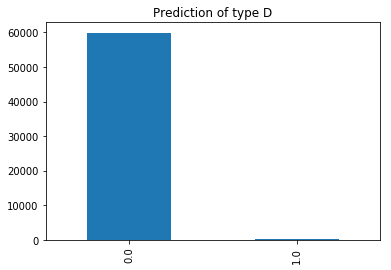

In [45]:
ClassS_product_forprediction['SoldFlag'].value_counts().plot.bar(title="Prediction of type D")
ClassS_product_forprediction.SoldFlag.value_counts()

In [46]:
# Products that would have 1.0 flag 
ClassS_product_forprediction[ClassS_product_forprediction["SoldFlag"]>0].head()

,SKU_number,ReleaseNumber,New_Release_Flag,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
index,,,,,,,,
98222,923985,0,0,14.95,399,4.00,0.00,1.0
98238,244510,0,0,17.00,359,5.90,0.00,1.0
98255,924169,1,0,32.00,764,4.00,8.79,1.0
98268,565514,0,0,9.99,445,4.59,0.00,1.0
98273,565409,0,0,8.00,482,2.98,0.00,1.0
